In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

In [3]:
y.shape

(70000,)

Presenting Pixel

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[36000, :]
some_digit_image = some_digit.to_numpy().reshape(28,28)


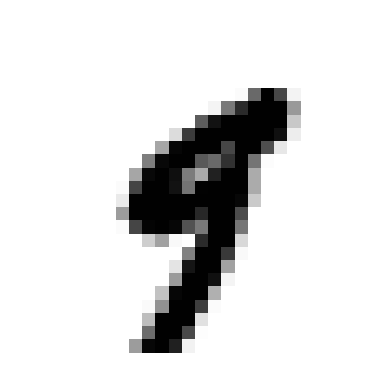

In [5]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[36000]

'9'

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train = X_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

In [8]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9676 , 0.9603 , 0.96635])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53818,   761],
       [ 1354,  4067]])

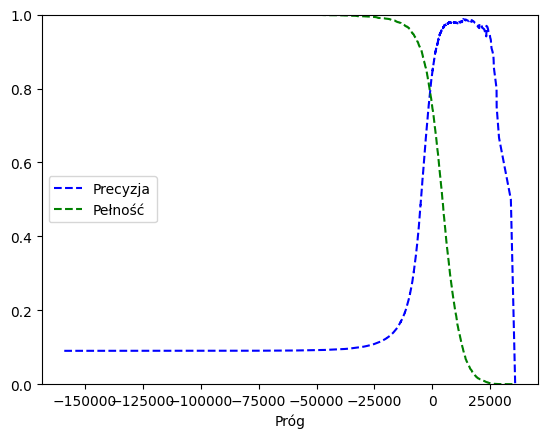

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precyzja")
    plt.plot(thresholds, recalls[:-1], "g--", label="Pełność")
    plt.xlabel("Próg")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [28]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_90 = (y_scores > 1500)
precision_score(y_train_5, y_train_pred_90)


0.9033210332103321

In [20]:
recall_score(y_train_5, y_train_pred_90)

0.3381294964028777

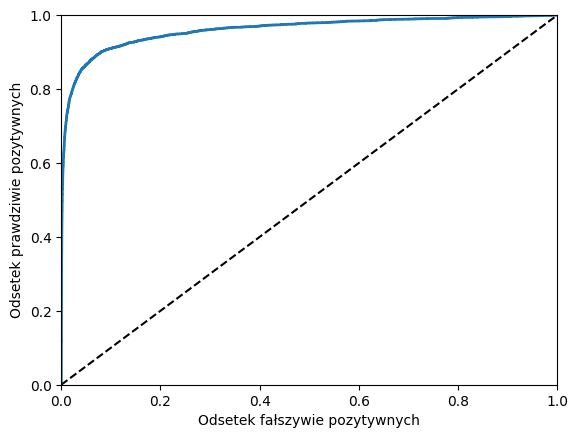

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel('Odsetek fałszywie pozytywnych')
    plt.ylabel('Odsetek prawdziwie pozytywnych')
    
plot_roc_curve(fpr, tpr)
plt.show()



In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9602626411443307

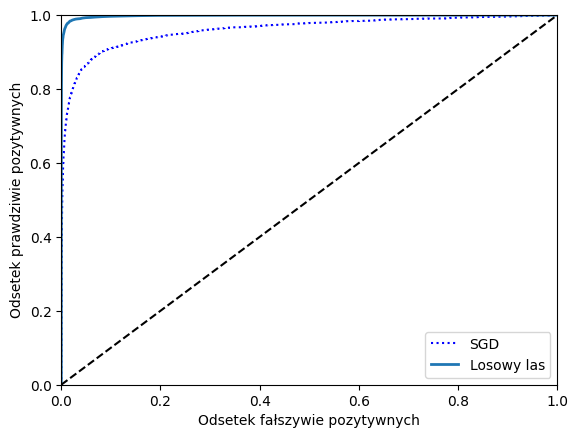

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Losowy las")
plt.legend(loc="lower right")
plt.show()


In [37]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['9'], dtype='<U1')

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-32468.75240943, -27624.42737563, -15477.20884048,
         -6581.24835351,  -6157.12140582,  -8703.67206305,
        -21610.50203222, -10842.53042411, -12845.25630445,
          -407.0050759 ]])

In [40]:
np.argmax(some_digit_scores)

9

Forest classifier

In [41]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['9'], dtype=object)

In [43]:
forest_clf.predict_proba([some_digit])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.  , 0.02, 0.07, 0.01, 0.  , 0.01, 0.01, 0.88]])

cross validation

In [46]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88915, 0.8788 , 0.8645 ])

Standard scaler

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88915, 0.8788 , 0.8645 ])

In [48]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5573,    1,   71,   17,    8,   61,   36,    5,  102,   49],
       [   3, 6437,   43,   17,   14,   33,   10,   11,  141,   33],
       [  46,   56, 5262,  105,   71,   60,   70,   68,  181,   39],
       [  13,   28,  286, 4953,   17,  429,   22,   73,  183,  127],
       [  12,   19,   70,   14, 5336,   38,   34,   37,   52,  230],
       [  48,   35,   85,  117,  116, 4629,   75,   24,  206,   86],
       [  39,   16,  133,    8,   84,  136, 5412,    2,   78,   10],
       [  20,   29,   68,   32,   83,   20,    6, 5591,   37,  379],
       [  36,  149,  194,   90,   86,  490,   29,   31, 4525,  221],
       [  28,   30,   51,   71,  334,   91,    1,  306,  106, 4931]])

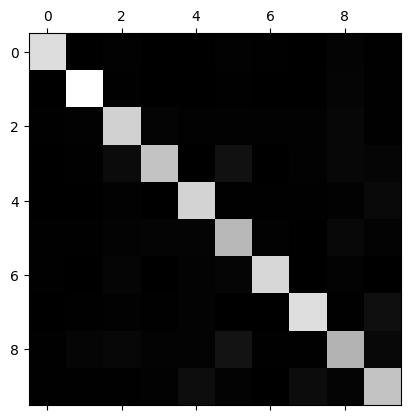

In [49]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

Deleting noise from picture

In [53]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mode = X_test

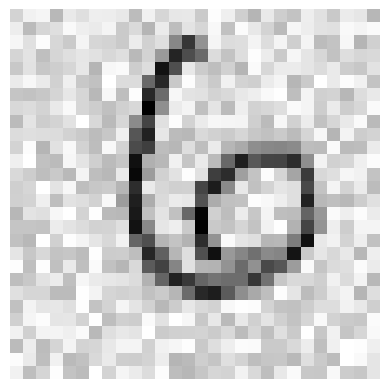

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


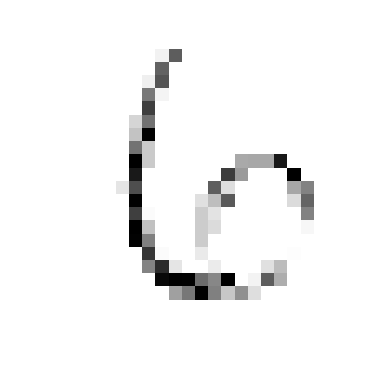

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
plt.imshow(X_test_mod.iloc[some_index].to_numpy().reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()
some_index = 100
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])
plt.imshow(clean_digit.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

